In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path

2024-10-28 10:28:38.160505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730082518.175126  112538 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730082518.179062  112538 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 10:28:38.195620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = Path('./bmi.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

for i,row in enumerate(header_row):
    print(i,row)

0 Gender
1 Height
2 Weight
3 Index


In [3]:
m = 0
n = len(header_row) -1

x_data_list,y_data_list = [],[]

for row in reader:
    m+=1
    x_data_list.append([float(item) if item not in ['Male', 'Female'] else (0 if item == 'Male' else 1) for item in row[0:n]])
    y_data_list.append(float(row[n]))

categories = len(list(set(y_data_list)))


In [4]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list).reshape(m,1)

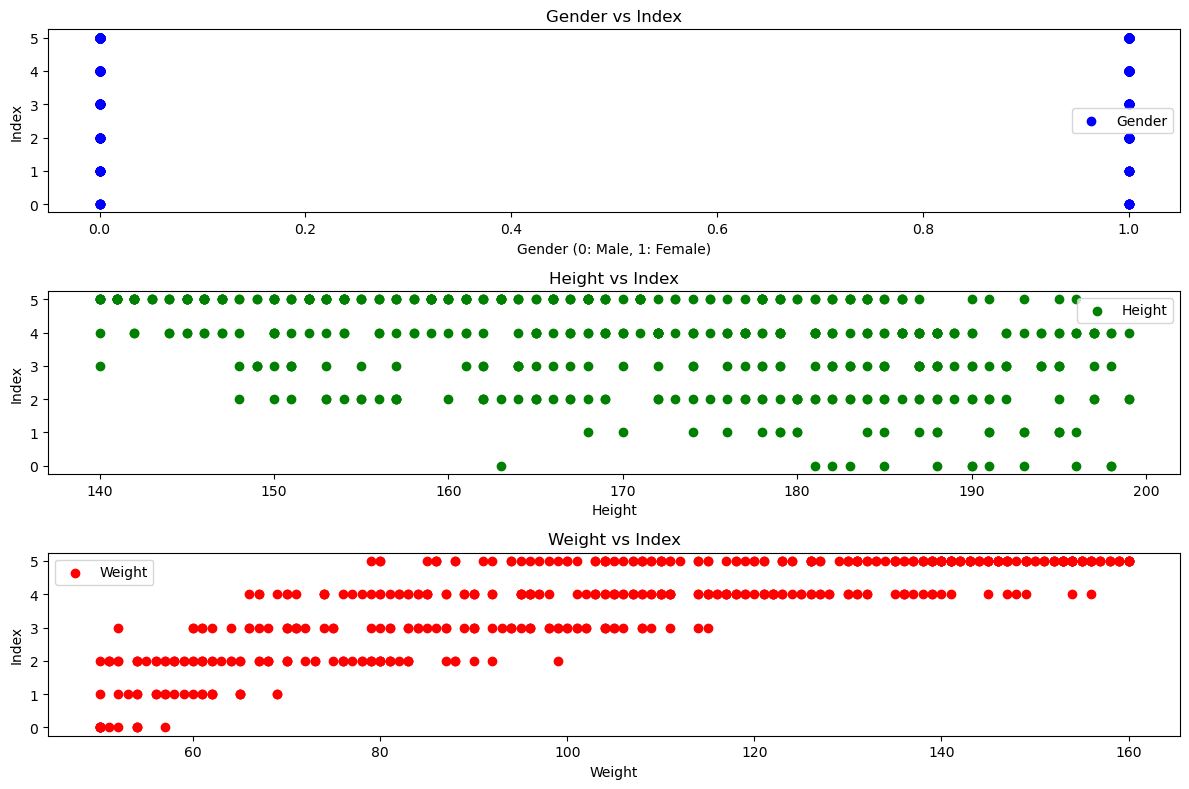

In [5]:
# Create a scatter plot for each feature against the Index
plt.figure(figsize=(12, 8))

# Gender vs Index
plt.subplot(3, 1, 1)
plt.scatter(x_data[:, 0], y_data, c='blue', label='Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Index')
plt.title('Gender vs Index')
plt.legend()

# Height vs Index
plt.subplot(3, 1, 2)
plt.scatter(x_data[:, 1], y_data, c='green', label='Height')
plt.xlabel('Height')
plt.ylabel('Index')
plt.title('Height vs Index')
plt.legend()
# Weight vs Index
plt.subplot(3, 1, 3)
plt.scatter(x_data[:, 2], y_data, c='red', label='Weight')
plt.xlabel('Weight')
plt.ylabel('Index')
plt.title('Weight vs Index')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
model = Sequential(
    [
        Input(shape=(n,)),
        Dense(units=12,activation='relu'),
        Dense(units=12,activation='relu'),
        Dense(units=categories,activation='softmax')
    ]
)
model.compile(optimizer=Adam(learning_rate=0.01),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.fit(x_data,y_data,epochs=1000,batch_size=100,verbose=1)




I0000 00:00:1730082522.544872  112538 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2179 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/1000


I0000 00:00:1730082523.612442  112687 service.cc:148] XLA service 0x7bb204007d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730082523.612466  112687 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-28 10:28:43.627442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730082523.696973  112687 cuda_dnn.cc:529] Loaded cuDNN version 90300


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0845 - loss: 74.6518 
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1335 - loss: 29.6757
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1235 - loss: 9.7006
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4352 - loss: 4.9400
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4462 - loss: 4.7072
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5205 - loss: 2.7434
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5427 - loss: 1.4554
Epoch 8/1000


I0000 00:00:1730082524.880003  112687 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5420 - loss: 1.4252  
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5822 - loss: 1.3893
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 1.2128
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 1.1018
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6033 - loss: 1.0485  
Epoch 13/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6090 - loss: 0.9985
Epoch 14/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.9392
Epoch 15/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5899 - loss: 0.9526  
Epoch 16/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6199 - loss: 0.8738
Epoch 17/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 0.8915
Epoch 18/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6204 - loss: 0.8712
Epoch 19/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - lo

In [9]:
y_predictions = model.predict(x_data)
y_predictions = np.argmax(y_predictions, axis=1)  # Convert probabilities to class labels
loss,accuracy = model.evaluate(x_data,y_data)

# Predict for the first sample
prediction = model.predict(x_data[0].reshape(1, n))
predicted_class = np.argmax(prediction, axis=1)

print(f"Predicted class: {predicted_class[0]}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9143 - loss: 0.2565
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: 4


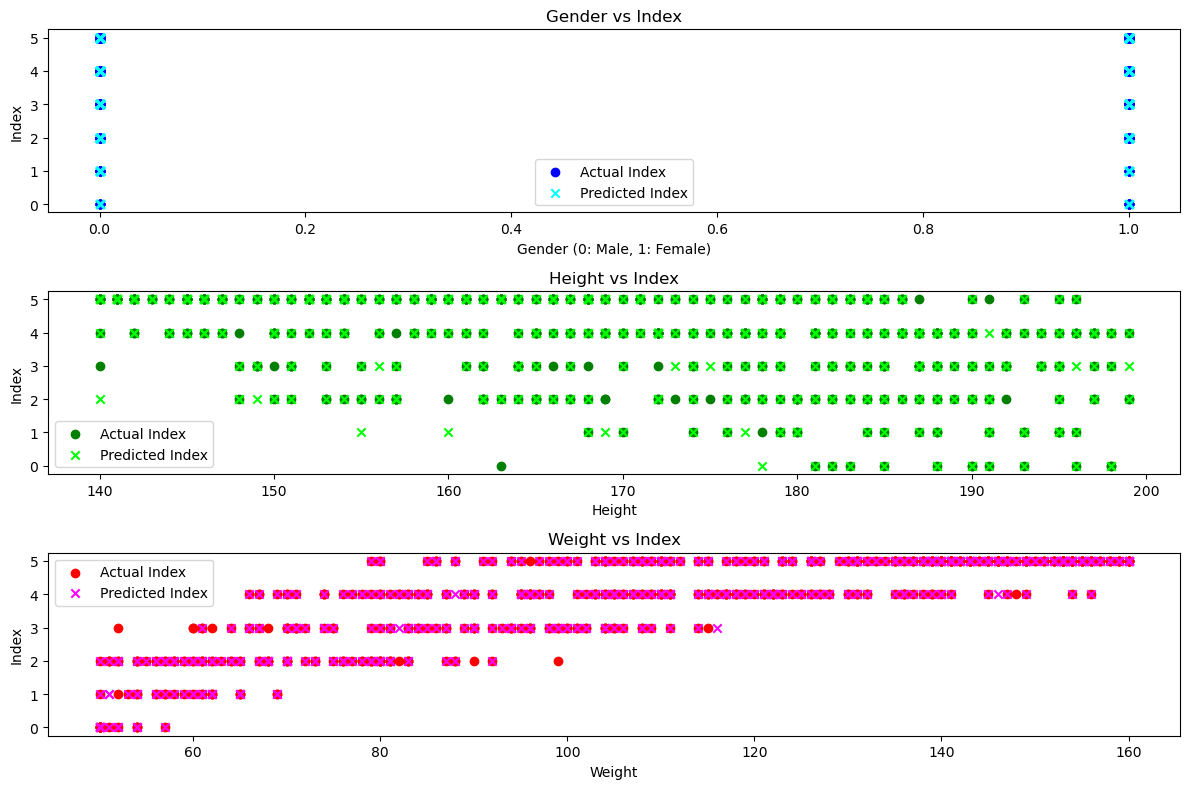

In [10]:
# Create a scatter plot for each feature against the Index
plt.figure(figsize=(12, 8))

# Gender vs Index
plt.subplot(3, 1, 1)
plt.scatter(x_data[:, 0], y_data, c='blue', label='Actual Index')
plt.scatter(x_data[:, 0], y_predictions, c='cyan', marker='x', label='Predicted Index')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Index')
plt.title('Gender vs Index')
plt.legend()

# Height vs Index
plt.subplot(3, 1, 2)
plt.scatter(x_data[:, 1], y_data, c='green', label='Actual Index')
plt.scatter(x_data[:, 1], y_predictions, c='lime', marker='x', label='Predicted Index')
plt.xlabel('Height')
plt.ylabel('Index')
plt.title('Height vs Index')
plt.legend()

# Weight vs Index
plt.subplot(3, 1, 3)
plt.scatter(x_data[:, 2], y_data, c='red', label='Actual Index')
plt.scatter(x_data[:, 2], y_predictions, c='magenta', marker='x', label='Predicted Index')
plt.xlabel('Weight')
plt.ylabel('Index')
plt.title('Weight vs Index')
plt.legend()

plt.tight_layout()
plt.show()